# Projeto Semana 11 - Python Reprograma - Cris Pereira

## Introdução
Nesse notebook realizo edições e faço uma análise inicial de dois bancos de dados, um de morte materna ao redor do mundo e outro relacionado à receita da indústria farmacêutica em diversos países (tema que tem a ver com a minha pesquisa de pós-graduação sobre o Complexo Industrial da Saúde - CEIS).  

## Processamento

In [5]:
import pandas as pd

In [6]:
df_health = pd.read_csv("health_indicators_ocde.csv")
df_mortality = pd.read_csv("maternal-mortality-who.csv")

In [7]:
df_health.head(3)

,VAR,Variable,UNIT,Measure,COU,Country,YEA,Year,Value,Flag Codes,Flags
0,PATCTOTT,Total pharmaceutical sales,MLLNCUMT,Million of national currency units,AUS,Australia,2010,2010,9795.0,D,Difference in methodology
1,PATCTOTT,Total pharmaceutical sales,MLLNCUMT,Million of national currency units,AUS,Australia,2011,2011,10261.0,D,Difference in methodology
2,PATCTOTT,Total pharmaceutical sales,MLLNCUMT,Million of national currency units,AUS,Australia,2012,2012,10355.0,D,Difference in methodology


In [8]:
df_mortality.head(3)

,Entity,Code,Year,Indicator:Maternal mortality ratio (per 100 000 live births)
0,Afghanistan,AFG,2000,1450
1,Afghanistan,AFG,2001,1390
2,Afghanistan,AFG,2002,1300


In [9]:
# Decidi colocar o dataframe com novas colunas em um novo objeto
df_newhealth = df_health.drop(columns= ['VAR', 'UNIT','COU','YEA','Flag Codes', 'Flags'])

In [10]:
# Verificando remoção das colunas
df_newhealth.columns

Index(['Variable', 'Measure', 'Country', 'Year', 'Value'], dtype='object')

In [11]:
# Decidi colocar o dataframe com novas colunas em um novo objeto
df_newmortality = df_mortality.drop(columns=["Code"])

In [12]:
# Verificando remoção das colunas
df_newmortality.columns

Index(['Entity', 'Year',
       'Indicator:Maternal mortality ratio (per 100 000 live births)'],
      dtype='object')

In [13]:
# Organizando pela coluna "Country"
df_newhealth = df_newhealth.sort_values(["Country"])
df_newhealth

,Variable,Measure,Country,Year,Value
0,Total pharmaceutical sales,Million of national currency units,Australia,2010,9795.0
37893,M-Musculo-skeletal system,Million of national currency units,Australia,2013,378.0
37892,M-Musculo-skeletal system,Million of national currency units,Australia,2012,312.0
37891,M-Musculo-skeletal system,Million of national currency units,Australia,2011,309.0
37890,M-Musculo-skeletal system,Million of national currency units,Australia,2010,324.0
...,...,...,...,...,...
29781,G-Genito urinary system and sex hormones,"Million US$, purchasing power parity",United Kingdom,2016,1032.7
29780,G-Genito urinary system and sex hormones,"Million US$, purchasing power parity",United Kingdom,2015,1022.2
29779,G-Genito urinary system and sex hormones,"Million US$, purchasing power parity",United Kingdom,2014,974.6
29792,G-Genito urinary system and sex hormones,"/capita, US$ purchasing power parity",United Kingdom,2013,15.3


In [14]:
# Organizando pela coluna "Entity" 
df_newmortality.sort_values(["Entity"], inplace=True)
df_newmortality

,Entity,Year,Indicator:Maternal mortality ratio (per 100 000 live births)
0,Afghanistan,2000,1450
17,Afghanistan,2017,638
16,Afghanistan,2016,673
15,Afghanistan,2015,701
14,Afghanistan,2014,786
...,...,...,...
3403,Zimbabwe,2001,629
3402,Zimbabwe,2000,579
3418,Zimbabwe,2016,468
3409,Zimbabwe,2007,671


In [15]:
# Não irei realizar a remoção de nulos, porque a pesquisa abaixo indica que não há valores nulos
print("Valores nulos por coluna do dataframe:")
print(df_newhealth.isnull().sum())

Valores nulos por coluna do dataframe:
Variable    0
Measure     0
Country     0
Year        0
Value       0
dtype: int64


In [16]:
# Não irei realizar a remoção de nulos, porque a pesquisa abaixo indica que não há valores nulos
print("Valores nulos por coluna do dataframe:")
print(df_newmortality.isnull().sum())

Valores nulos por coluna do dataframe:
Entity                                                          0
Year                                                            0
Indicator:Maternal mortality ratio (per 100 000 live births)    0
dtype: int64


In [17]:
# Resetando o index de cada banco de dados
df_newhealth.reset_index(drop=True, inplace=True)

In [18]:
# Resetando o index de cada banco de dados
df_newmortality.reset_index(drop=True, inplace=True)

# Conclusão
Irei tentar verificar se há correlação entre vendas farmacêuticas e mortalidade materna.

In [19]:
import seaborn as sn

Vou unir os dois dataframes em um só para fazer uma análise de correlação, mas antes vou editar o df de mortalidade mudando o nome da coluna Entity para Country - para ficar igual ao df de saúde. 

In [20]:
# Primeiro uma cópia do df de mortalidade materna
df_mortalitycopy = df_newmortality.copy()
df_mortalitycopy.rename(columns={'Entity': 'Country'}, inplace = True)
df_mortalitycopy

,Country,Year,Indicator:Maternal mortality ratio (per 100 000 live births)
0,Afghanistan,2000,1450
1,Afghanistan,2017,638
2,Afghanistan,2016,673
3,Afghanistan,2015,701
4,Afghanistan,2014,786
...,...,...,...
3415,Zimbabwe,2001,629
3416,Zimbabwe,2000,579
3417,Zimbabwe,2016,468
3418,Zimbabwe,2007,671


In [21]:
# Unindos os dataframes em um só
df_correlation = pd.merge(df_mortalitycopy, df_newhealth, how = 'inner', on = ('Country','Year'))
df_correlation.head(3)

,Country,Year,Indicator:Maternal mortality ratio (per 100 000 live births),Variable,Measure,Value
0,Australia,2016,6,B-Blood and blood forming organs,Million of national currency units,667.0
1,Australia,2016,6,M-Musculo-skeletal system,Million US$ at exchange rate,316.7
2,Australia,2016,6,M-Musculo-skeletal system,Million of national currency units,426.0


In [22]:
df_correlation.columns

Index(['Country', 'Year',
       'Indicator:Maternal mortality ratio (per 100 000 live births)',
       'Variable', 'Measure', 'Value'],
      dtype='object')

In [23]:
df_correlation.head(3)

,Country,Year,Indicator:Maternal mortality ratio (per 100 000 live births),Variable,Measure,Value
0,Australia,2016,6,B-Blood and blood forming organs,Million of national currency units,667.0
1,Australia,2016,6,M-Musculo-skeletal system,Million US$ at exchange rate,316.7
2,Australia,2016,6,M-Musculo-skeletal system,Million of national currency units,426.0


In [24]:
# Vou mudar o nome das colunas para fazerem mais sentido 
df_correlation.rename(columns={'Variable': 'Type_of_Medicine'}, inplace = True)
df_correlation.rename(columns={'Value': 'Total_Sales_Value'}, inplace = True)

In [26]:
# Dando uma verificada nos dados
df_correlation.describe()

,Year,Indicator:Maternal mortality ratio (per 100 000 live births),Total_Sales_Value
count,34193.000000,34193.000000,3.419300e+04
mean,2013.515135,8.310385,4.743234e+03
std,2.266302,6.548559,1.202409e+05
min,2010.000000,2.000000,0.000000e+00
25%,2012.000000,5.000000,4.600000e+00
50%,2014.000000,6.000000,2.050000e+01
75%,2015.000000,10.000000,1.518000e+02
max,2017.000000,46.000000,6.987367e+06


In [27]:
# Vou excluir as colunas com dados string e manter só valores que quero relacionar
df_correlationvalues = df_correlation.drop(columns= ["Measure","Country", "Year", "Type_of_Medicine"])


In [28]:
df_correlationvalues.columns

Index(['Indicator:Maternal mortality ratio (per 100 000 live births)', 'Total_Sales_Value'], dtype='object')

In [29]:
# Testando criar a correlação
correlation = df_correlationvalues.corr()

<Axes: >

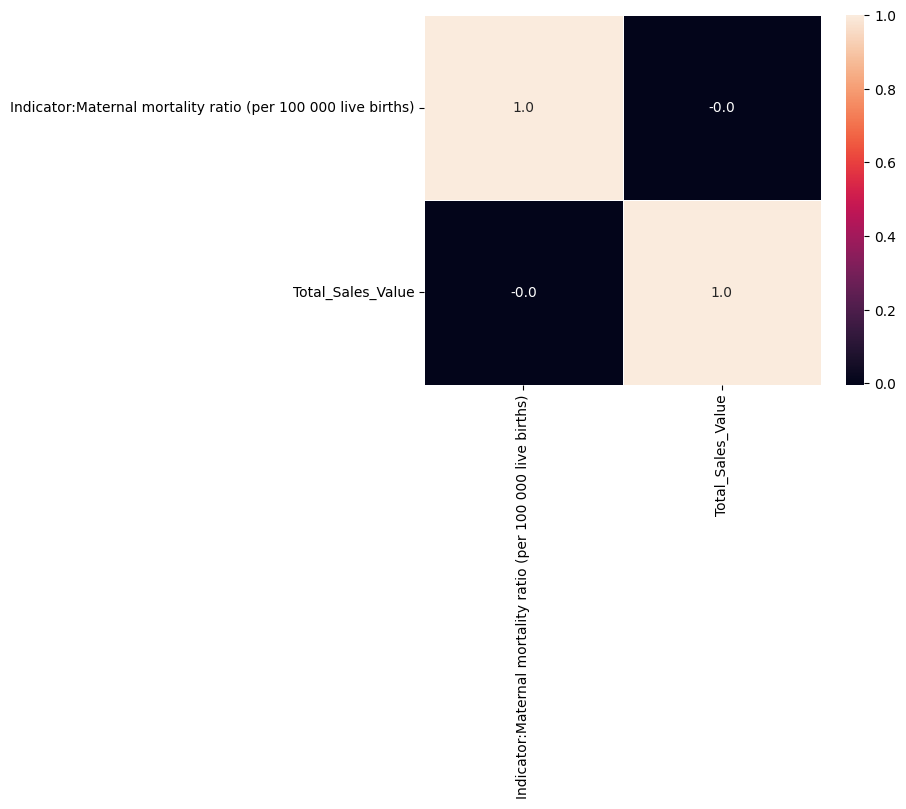

In [30]:
#Plot da matriz de correlação 
plot = sn.heatmap(correlation, annot = True, fmt=".1f", linewidths=.6)
plot

O insight por enquanto é que não tem correlação nenhuma, mas preciso limpar mais os dados, pensei em selecionar uma lista de países num ano específico ou um país ao longo do tempo - tentei fazer e não consegui :/

# Finalizando salvando dataframe de correlação em csv

In [32]:
df_correlation.to_csv("MaternalMortality_HealthIndicators.csv")